# Summary

## Overview of Qarik Project

Qarik provides a corpus of World Bank Loans. The goal of this project is to offer insights into economic and development trends from this unstructured data. Group Bear hopes to achieve this goal through first extracting the text in each Loan Agreement and then cleaning the data to extract some available features of interest. After extracting the relevant features, we also obtain external economic data on the countries in the loan amount in order aid in our analysis of different economic and development trends. We also provide two models (LDA and k-means) for clustering the corpus by which sectors of the economy are impacted from the project descriptions and project names for each Loan Agreement. Additionally, we provide visualizations of the data using Tableau.

## Stakeholders and KPI

### Stakeholders

- World Bank
- Government Bodies and Journalists
- Economic Analysts

### KPIs

- Successfully extract relevant features from over 95% of the documents. Relevant features include: name of country taking the loan, loan amount, year of loan approval, project name, and project description
- Preprocess the extracted data according to each country's economic reality – for example, by normalizing the loan by the country's GDP.
- Successfully cluster loans based on the project description, with over 90% accuracy. In order to check if we were successful we could take a sample of 100 loans and manually check if we think that these loans actually belong to their assigned clusters.
- Interpretability of our analysis via data visualization. We would like our analysis to be easily understood by a non-technical audience – this is crucial if we want our analysis to have a real-world impact.


## Extract Data

The corpus of World Bank loans consists of 3205 World Bank Loan Agreements in a pdf format. Of the 3205 loan agreements, 400 of them were scanned documents put in a pdf format. Generally, the loans were either standard pdfs or scanned images converted to a pdf format. The dates of the loan agreements range from 1990 to 2021. Below is an example of the first two pages of a Loan Agreement of a standard pdf.

<table><tr>
<td> <img src="img/ex_1.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="img/ex_2.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

Below is an example of the first two pages of a Loan Agreement that is a scanned image in pdf format.

<table><tr>
<td> <img src="img/ex1_1.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="img/ex1_2.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

In order to extract the data we tried both Python packages PyMuPdf and PDFminer.six. Between these two packages, PyMuPdf performed better as the structure and order of the document was maintained. However, neither of these packages were able to extract any text from the 400 scanned pdfs. For those documents we use pyTesseract (OCR software) in order to extract those texts. A disadvantage of the OCR software is that at times certain characters were not correctly recognized and so the text contained typos and the OCR software also took significantly longer time to run.

The python scripts used to extract the texts are located in the Extract_Data folder. Please refer to them for further information on the implementation.

The raw text files that were extracted from the original pdf files are located in the PyMuPdf_Text and Tesseract_Text folders.

## Clean Data

The features that we chose to extract from the Loan Agreements were as follows:

- Loan Amount (and Currency that it was in)
    - Extracted for ~95% of Loan Agreements with an estimated accuracy of ~93%
- Name of the Country
    - Extracted for 100% of Loan Agreements with an estimated accuracy of
- Date of Agreement
    - Extracted for 100% of Loan Agreements with an estimated accuracy of ~100%
- Project Name
    - Extracted for 91% of Loan Agreements with an estimated accuracy of ~98%
- Project Description
    - Extracted for 92% of Loan Agreements with an estimated accuracy of ~93%
    

The notebook and scripts used to extract and clean this data from the text files are located in the Clean_Data Folder in their respective folders. Please refer to the notebooks and scripts for further information on their implementation. 

## Finalized Data 

#### Currency Conversion

Raw loan amount (and currency) data was further processed. First, all loans were converted to USD using historical exchange date data from:

https://fxtop.com/en/historical-exchange-rates.php

Currency conversions were NOT adjusted for inflation. Conversions are done an a yearly basis using average values for that year. The coding and details of how this was done is available in "Convert Loan Amount Currency" in Clean_Data/loan_amount.

#### World Bank External Data

We extracted external data to use for an ML model. Since our loan documents were already from the World Bank, we extracted this additional information from the World Bank:

https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

https://info.worldbank.org/governance/wgi/

Information extracted from these were:

- GDP per Capita (put into 2021 USD equivalent)
- Political stability / absence of violence/terrorism
- Literacy rate (as a percentage of adult population)
- Electricity usage (as a percentage of population)
- Gini coefficient (a measure of economic inequality)

Further details are provided in "Regression Data" Clean_Data/loan_amount

#### Imputations

The World Bank External Data gathered above had gaps which we imputed. Most of these pieces of data seemed to follow well-defined trends over the 30 year spans we were interested in (i.e. GDP per Capita, Literacy, Electricity usage), so we imputed these values using best-fit approximations. All other missing values we imputed using KNN (K Nearest Neighbors) Imputations from sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

For example, with the electricity usage from India, we have the following values:

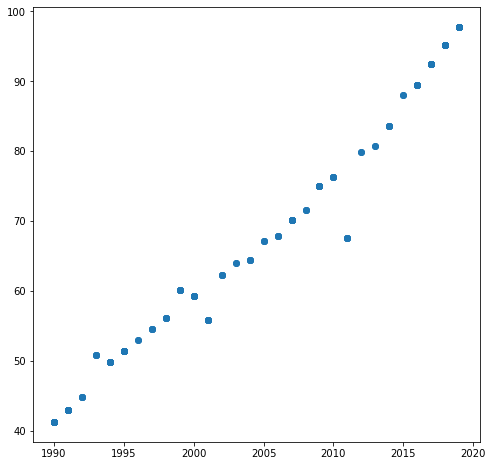

Here the values from 1990, 1991, and 1992 are imputed from all other values using a best-fit line.

## Visualizations

For our initial data exploration, we looked first at map data to get a sense of how loan amounts varied by country. Of particular interest were countries in Eastern Europe, Middle East, Northern Africa, and Asia:

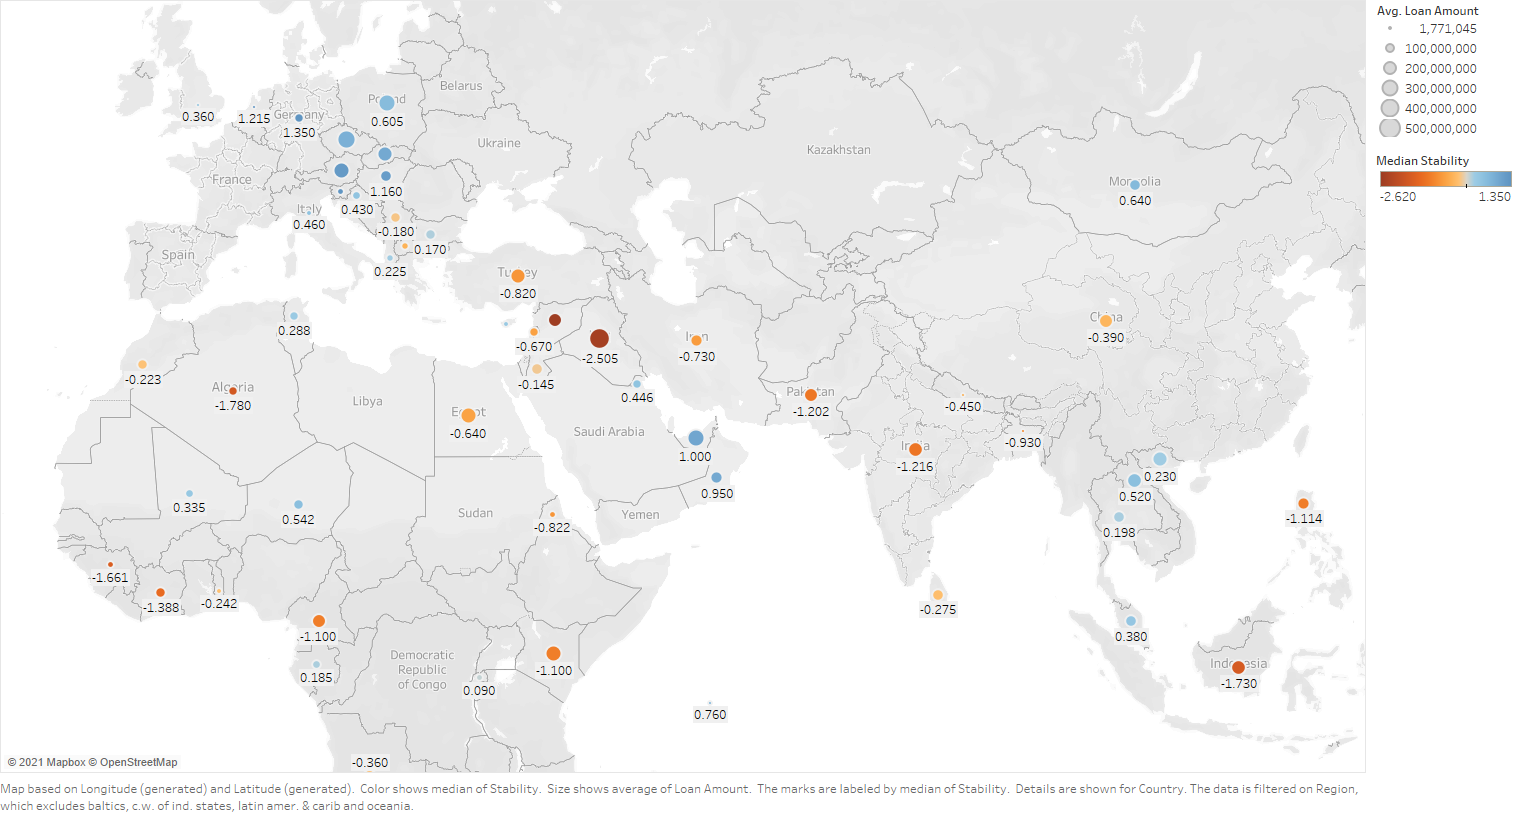

Many countries with large average loan amounts seemed to have a low stability index, which was unexpected. However, there are several outliers in this trend specifically in Europe and of particular interest: Poland.

To investigate further, we plotted the sum of loans per year for each region and country:

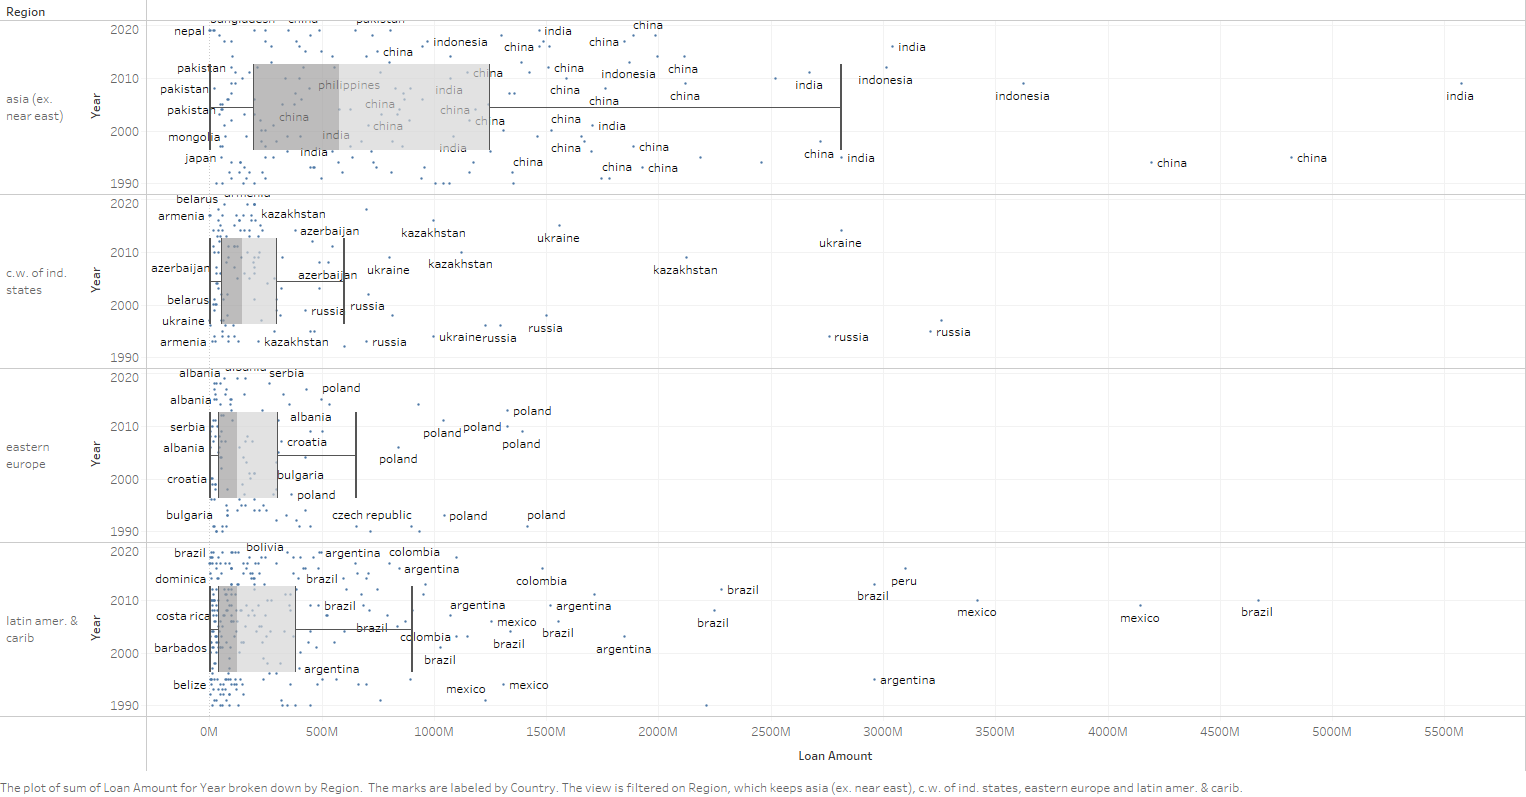

Initial plots of sum of loans per year for each region and country resulted in some countries having extremely high loan sums (around \\$7B USD), which were double-checked for accuracy. Some incorrect loan amounts were identified and manually fixed.

Certain outlier countries stand out: India, China, Indonesia, Poland, Russia, Mexico, Brazil

Most of these countries have a low political stability index (Poland being a main exception), but around an average or higher GDP per Capita. With our stakeholders being government entities in mind, we asked if these indicators, along with data mined from the loan documents such as sector information, could be utilized to either predict or help determine when countries get loans and if so, an estimate of how much their loan amount would approximately be. This would help government entities prepare their loans, funding plans, and focus on improvements to their country that have a higher likelihood of being funded.

## Models

### Latent Dirchlet Allocation Model for Clustering

LDA is an unsupervised topic analysis technique used to cluster by topic. This generative model uses the lemmatized words from project name and description of each document in order to determine a probability distribution for each document to see the probability the document belongs to each topic/cluster. The cluster that each document belongs to was determined by taking the topic/cluster with maximum probability. One should note that the model is stochastic in nature and so the results of the model change every time it is run.

The LDA model also takes as input the number of clusters. While the World Bank has loans arranged into 11 sectors, it was determined that topic coherence was maximized with 7 topics/clusters. This results in some of the topics/clusters being combination of several sectors, indicating relationships between different sectors of the economy. Below is a visualization of the 7 topics/clusters generated by the LDA model. 

In addition to using unigrams, the model was also run using bigrams. However, the topic coherence was lower and the bigrams representing each of the topics were not as clear as with model with unigrams.

The LDA model implementation is located in the LDA folder in the Cluster_Data folder. The distribution for each document is saved as lda_sector_distr.csv. The topic/sector determined for each document is saved as lda_sector.csv.

In [1]:
from IPython.display import IFrame

IFrame(src='img/lda.html', width=900, height=900)

### GloVe and KMeans Model for Clustering

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words. More details about GloVe can be found here:[GloVe](https://nlp.stanford.edu/projects/glove/)

The world bank groups its projects into 11 sectors. The detailed descriptions of each sector can be found here: [WorldBank](https://projects.worldbank.org/en/projects-operations/project-sector?lang=en&page=).

This model assigns each loan agreement and each sector description a vector, by averaging the vector representations of words in the corresponding document and the dictionary. These 300-dimensional vector representations are pre-trained from GloVe, and the dictionary consists of around 6000 words. 

This model uses KMeans to group these vector representations into 11 clusters. If a loan agreement and a sector description are in the same cluster, then the model concludes this loan agreement belongs this sector. 

More details on how to get the dictionary and on the implementation of this model can be found in the Kmeans_Glove folder of the Cluster_Data folder.

Below is the visualization of clusters using TSNE. Yellow dots are vector representations of loan agreements, while colored dots are sector descriptions.

In [3]:
from IPython.display import Image

Image(url= "img/tsne.png", width=400, height=400)

### GDP Analysis

## Future Work

We attempted to start building a ML model to predict average loan amount from our finalized dataset:

- GDP per Capita (put into 2021 USD equivalent)
- Political stability / absence of violence/terrorism
- Literacy rate (as a percentage of adult population)
- Electricity usage (as a percentage of population)
- Gini coefficient (a measure of economic inequality)
- Sector of loan (Classified using LDA Clustering Model)
- World Geographic Region

A series of different models were chosen to tackle this problem. The first approach was using Linear Regression. Using a 5-fold cross validation, the average CV-MSE on the average loan amount for this model was 115,579. The "best" model was using a Random Forest which resulted in an average CV-MSE of 31,305.24. The RMSE of this model is about 176.93, which for reference is in millions of USD. For reference, the average loan amount is about 134.76 million USD.

Our baseline model was taking the average loan amount from the training set. This baseline model scored an RMSE of \\$164.55M on the test set. The Random Forest scored an RMSE of \\$121.67M on the test set. (The Linear Regression model performed about the same as the baseline model on the testing set.)

Since a Random Forest still performed best (even though slightly better than the baseline), we examined at the Shap values to see which features seemed to impact the model the most to better understand what was happening and to help discern what the model may need to perform better. Stability, GDP per Capita, and Sector seemed to be the most impactful pieces of information as shown below:

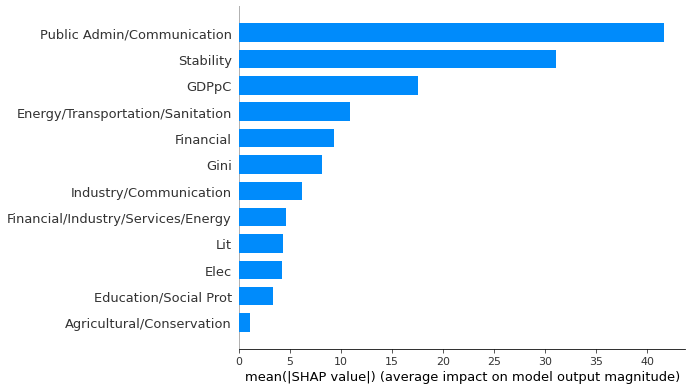

Region was removed from this figure since it was not impacting the performance of the model.

Using a summary plot, we tried to see which features were positively or negatively correlated:

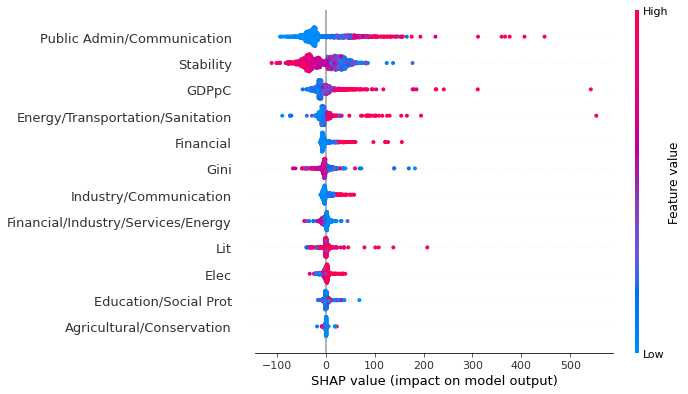

For example, the sector of Public Administration / Communication is positively correlated with the average loan amount. (Larger (red) values are listed on the right while lower (blue) values are listed on the left.) That is, this sector amount greatly increases the predicted loan amount.

Conversely, stability is negative correlated with the average loan amount. (Larger (red) values are listed on the left while lower (blue) values are listed on the right.)

This is also seen in a specific example:

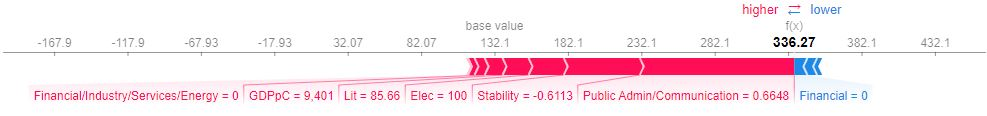

This indicates which factors are causing a lower or higher prediction in the Random Forest Model. A likelihood being in the Public Administration / Communication Sector greatly increases the loan amount prediction. A negative stability also increases the loan amount prediction.

From this, we were also able to determine how complex this problem is. It is possible we are missing essential data to accurately model the average loan amount. It is also possible that the World Bank sets goals that would not be feasible to model as discussed below.

It is also possible that the external data utilized was too sparse and certain trends could not be accurately captured. A more in-depth analysis would be warranted for any future work.

After our analysis and further research into the World Bank, we had found some considerations from 2004 on providing development policy lending:

http://www1.worldbank.org/publicsector/pe/befa05/OP860.htm

As per the above link, the following considerations are made for determining the total volume/share of the loan:

    (a) the country’s financing requirements, given the actions necessary to achieve the expected results of the program, the costs of the program, the size and disbursement profile of the Bank’s lending program, and other financing available;

    (b) for IDA (International Development Association) borrowers, the country’s relative allocation of available concessional resources; and for IBRD (International Bank for Reconstruction and Development) borrowers, the country’s exposure to IBRD in the context of creditworthiness and risks;

    (c) the borrower’s overall debt sustainability, based on an assessment of the expected impact of development policy program on the debt condition of the country;

    (d) the country’s absorptive capacity;

    (e) country performance triggers for Country Assistance Strategy lending scenarios.

This led us to believe that in order to create a less biased regression model, we would need to use more features with larger explainability power, such as absorptive capacity, debt sustainability, as well as the country performance triggers mentioned. A more in-depth analysis would be required to determine which economic and social indicators should be considered.